In [212]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

plt.rcParams["figure.figsize"]=(15,5)

In [213]:
def transf_fourier_d (t_k, y_k,f):
    suma_fourier=0
    for i in range(0,len(t_k)):
        suma_fourier=+suma_fourier+y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
        
    return suma_fourier

In [214]:
t_k=np.linspace(0,20,200)
y_k=np.sin(t_k)
f=0.1

In [215]:
x=transf_fourier_d(t_k,y_k,f)
x

np.complex128(10.18289058873271-9.43536532570872j)

Pregunta 2

In [216]:
N=100
max=50
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((t[1])),100)    

In [217]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)
eje_y

array([-8.35202469e-03, -7.84701368e-03, -6.32815343e-03, -3.78386139e-03,
       -1.94491315e-04,  4.46819925e-03,  1.02418358e-02,  1.71745139e-02,
        2.53262528e-02,  3.47709109e-02,  4.55986947e-02,  5.79194522e-02,
        7.18670191e-02,  8.76050123e-02,  1.05334651e-01,  1.25305482e-01,
        1.47830383e-01,  1.73307002e-01,  2.02249254e-01,  2.35335050e-01,
        2.73481406e-01,  3.17968194e-01,  3.70653911e-01,  4.34380009e-01,
        5.13804051e-01,  6.17357865e-01,  7.62853877e-01,  1.00008422e+00,
        1.63669786e+00,  1.23374557e+00,  8.39248839e-01,  6.25946644e-01,
        4.75733177e-01,  3.57760960e-01,  2.59248848e-01,  1.73632155e-01,
        9.70731767e-02,  2.71246610e-02, -3.78701693e-02, -9.90743308e-02,
       -1.57308979e-01, -2.13124603e-01, -2.66817538e-01, -3.18400371e-01,
       -3.67527733e-01, -4.13382780e-01, -4.54552804e-01, -4.88975494e-01,
       -5.14107542e-01, -5.27465304e-01, -5.27465304e-01, -5.14107542e-01,
       -4.88975494e-01, -

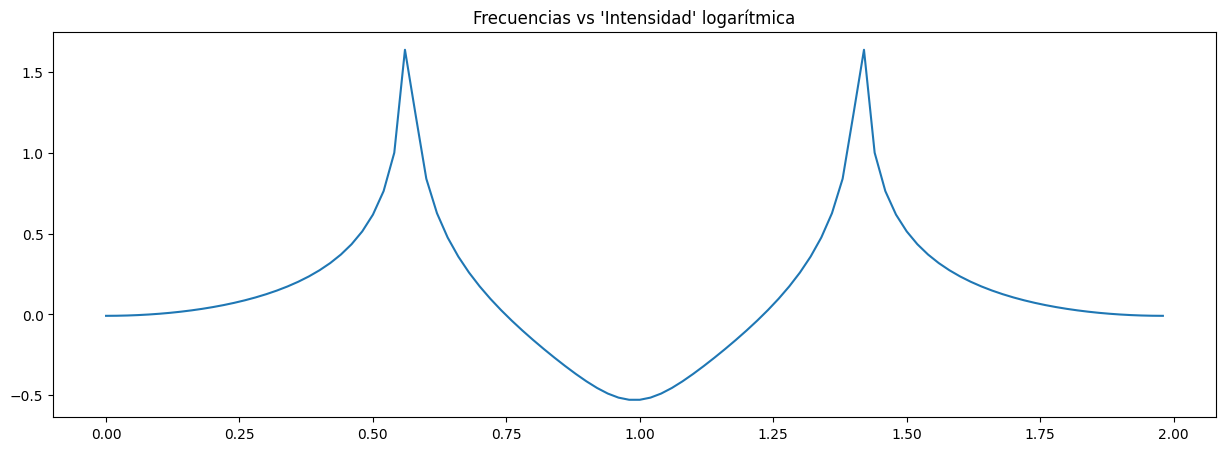

In [218]:
fig, ax = plt.subplots()

plt.plot(f, eje_y)
plt.title("Frecuencias vs 'Intensidad' logarítmica")

plt.show()

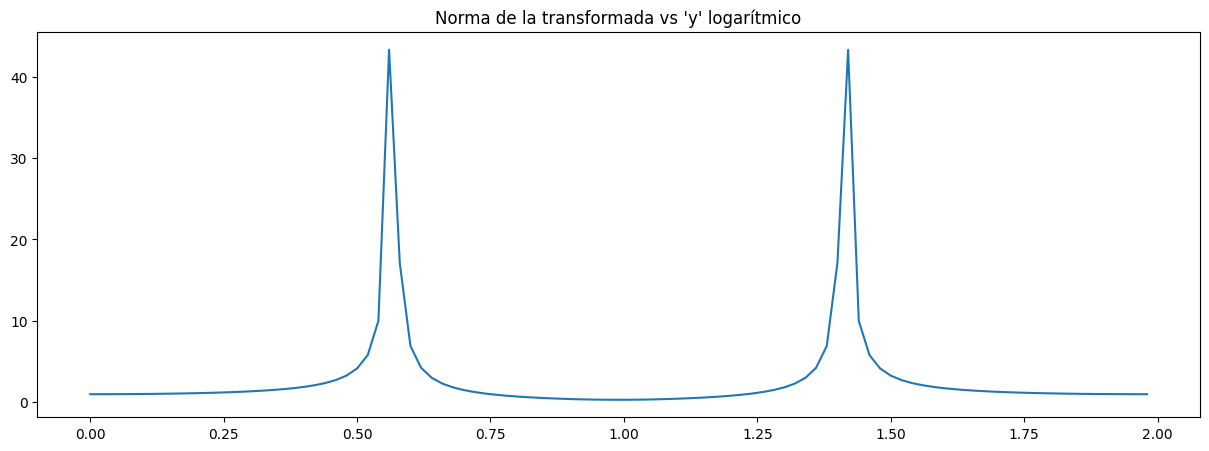

In [219]:
fig, ax = plt.subplots()

plt.plot(f, norma)
plt.title("Norma de la transformada vs 'y' logarítmico")

plt.show()

In [220]:
ruido=np.random.normal(0.0,0.1,len(y))
y_ruido=y+ruido

In [221]:
norma_ruido=abs(transf_fourier_d(t,y_ruido,f))
eje_y_ruido=np.log10(norma_ruido)
eje_y_ruido

array([-4.25271196e-02, -4.71487455e-01,  2.49311977e-01,  4.31445208e-02,
        1.84530727e-01,  2.01727850e-01,  2.05081470e-01,  2.33560895e-01,
        3.51100643e-01, -3.49732373e-01,  1.60789618e-01, -2.03067485e-01,
        1.44410382e-01,  3.07769828e-01, -4.01911412e-02,  1.16321241e-01,
       -6.99617584e-04,  1.19806384e-01,  3.06439511e-01,  3.18053568e-01,
        4.97231222e-01,  2.92693519e-01,  5.21026914e-01,  5.93955593e-01,
        4.33399399e-01,  4.57342771e-01,  8.30074059e-01,  9.71556195e-01,
        1.62347654e+00,  1.24091306e+00,  8.33906260e-01,  5.83951515e-01,
        5.08331485e-01,  3.96430293e-01,  4.52622506e-01,  8.18146104e-02,
        3.80161699e-01, -1.63533423e-01,  4.30076199e-02, -1.38799055e-02,
       -1.27028286e-01,  2.70662991e-01, -2.77321958e-01,  2.72135476e-01,
       -1.95890569e-01, -2.80993136e-01, -3.26465819e-01, -4.78280186e-02,
       -7.79558492e-02, -5.47665291e-01, -5.47665291e-01, -7.79558492e-02,
       -4.78280186e-02, -

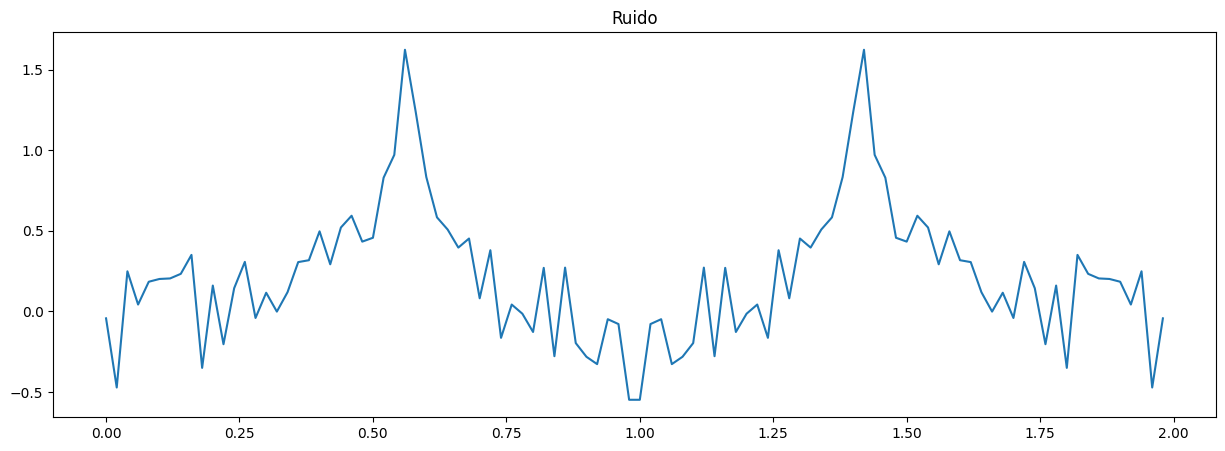

In [222]:
fig, ax = plt.subplots()

plt.plot(f, eje_y_ruido)
plt.title("Ruido")

plt.show()

¿Qué sucede si le agrega ruido a la señal en 𝑦?

Si se le agrega ruido a la señal en 𝑦, esta se vuelve menos 'nítida' y se vuelve más complicado identificar la señal principal. Es decir, 
Cuando se añade ruido a la señal, el espectro de frecuencias se expande, lo que complica la identificación de la frecuencia fundamental que caracteriza a la señal original. Esto se debe a que el ruido se dispersa a lo largo de un amplio rango de frecuencias, provocando que la señal original pierda claridad y se vea afectada en su integridad. De esta manera, la capacidad para distinguir las características esenciales de la señal es considerablemente más complicado. 

Pregunta 3

In [223]:
N=100
max=500
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((t[1])),100)   

In [224]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)

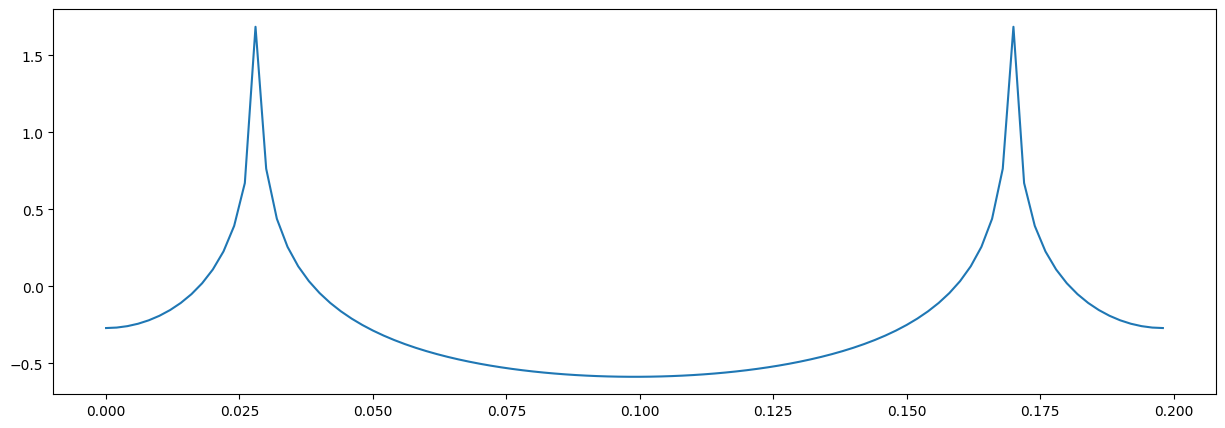

In [225]:
fig, ax = plt.subplots()
plt.plot(f, eje_y)
plt.show()

In [226]:
max_y=eje_y.min()
for i in range(0,len(eje_y)):
    if eje_y[i] == eje_y.max():
        max_f=f[i] #pico para gráfica f vs 'y' log
        
max_y_=eje_y.max()

print("El pico principal de de la norma de la transformada es " + str(max_f) + " para la frecuencia y "+str(max_y_)+ " para la intensidad en escala logarítmica")

El pico principal de de la norma de la transformada es 0.17 para la frecuencia y 1.6864251591237405 para la intensidad en escala logarítmica


In [227]:
media_altura_y=eje_y.min()+((eje_y.max()-eje_y.min())/2)
idx=np.argmin(abs(abs(eje_y)-media_altura_y))
ancho=abs(f[idx]-f[np.argmax(eje_y)])



In [228]:
peak_idx = np.argmax(eje_y)
left_idx = np.where(eje_y[:peak_idx] <= media_altura_y)[0]
right_idx = np.where(eje_y[peak_idx:] <= media_altura_y)[0]

if len(left_idx) == 0 or len(right_idx) == 0:
    
    fwhm=0
    
left_idx = left_idx[-1]  # Último índice a la izquierda del pico
right_idx = right_idx[0] + peak_idx  # Primer índice a la derecha del pico

fwhm = f[right_idx] - f[left_idx]

print("El ancho a media altura es " + str(fwhm))

El ancho a media altura es 0.008000000000000007


a) Cuando cambiamos el número de muestras N, no cambia la posición del pico debido a que seguimos utilizando la misma frecuencia, solo que ahora tenemos una mejor resolución debido a que con más muestras tenemos más datos y podemos tener una transformada con mayor detalle. SIn embargo, sí varía la FWHM debido a que...

b) Cuando cambiamos el rango de tiempo t_max, cambia la posición del pico


Pregunta 4

In [229]:
N = 80
#Nyq=N/10
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
Nyq=1/ts_0[1]
fs = np.arange(0,3*Nyq,0.01)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)


In [230]:
norma=abs(transf_fourier_d(ts,ys,fs))

pico=fs[np.argmax(norma)]
pico

np.float64(6.28)

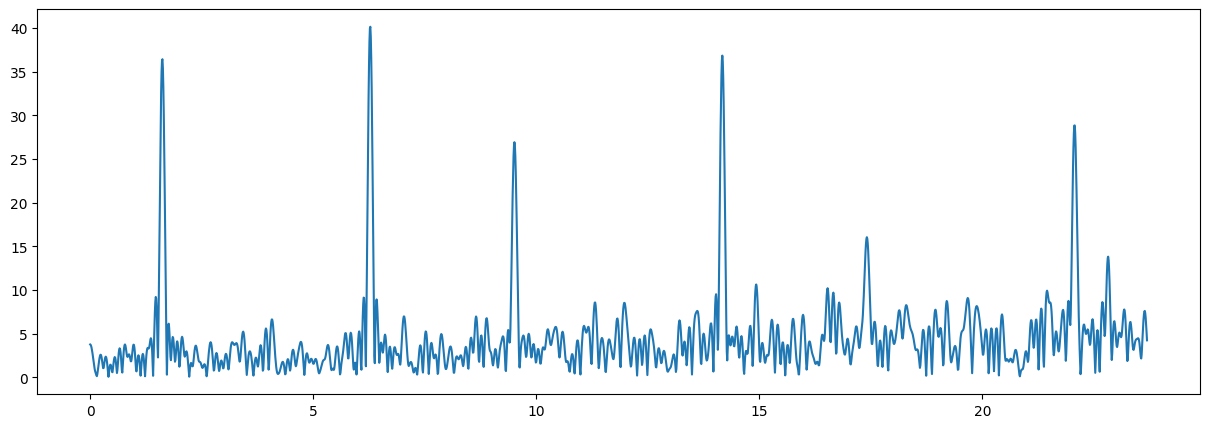

In [231]:
plt.plot(fs, norma)
plt.show()

 ¿Es posible recuperar la frecuencia original? ¿Por qué?
 
 Sí, se puede recuperar la frecuencia original. Esto ocurre porque al introducir ruido en la variable de tiempo t, se altera la uniformidad del muestreo, lo que reduce el aliasing que normalmente se produce con un muestreo regular. Esta alteración permite obtener más detalles sobre la señal, lo que hace posible identificar frecuencias más altas, incluso aquellas que superan el límite de Nyquist.

Pregunta 5 --- Bono

In [232]:
url="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
columnas = ['t', 'y', '𝜎_y']
df = pd.read_csv(url, sep='\\s+', header=None,names=columnas)
df['y']-=df['y'].mean()
df


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
fs=np.linspace(0,5,40000)
norma=abs(transf_fourier_d(df['t'],df['y'],fs))

f_ppal=fs[np.argmax(norma)]
print(f_ppal)

3.2592064801620038


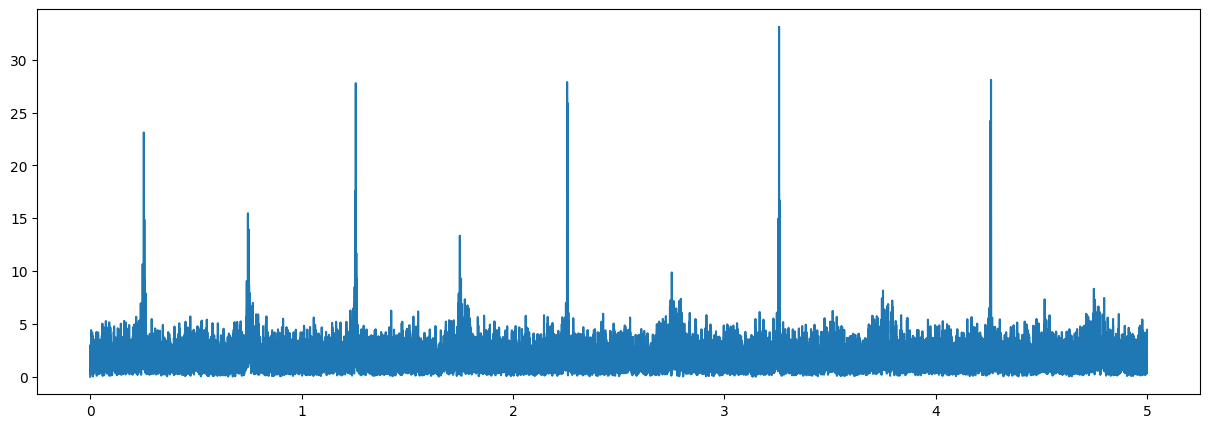

In [ ]:
plt.plot(fs, norma)
plt.show()

In [ ]:
phi=np.mod(df['t']*f_ppal,1)
phi

0      0.595287
1      0.119566
2      0.655707
3      0.625920
4      0.883464
         ...   
396    0.116769
397    0.613767
398    0.282361
399    0.242563
400    0.312588
Name: t, Length: 401, dtype: float64

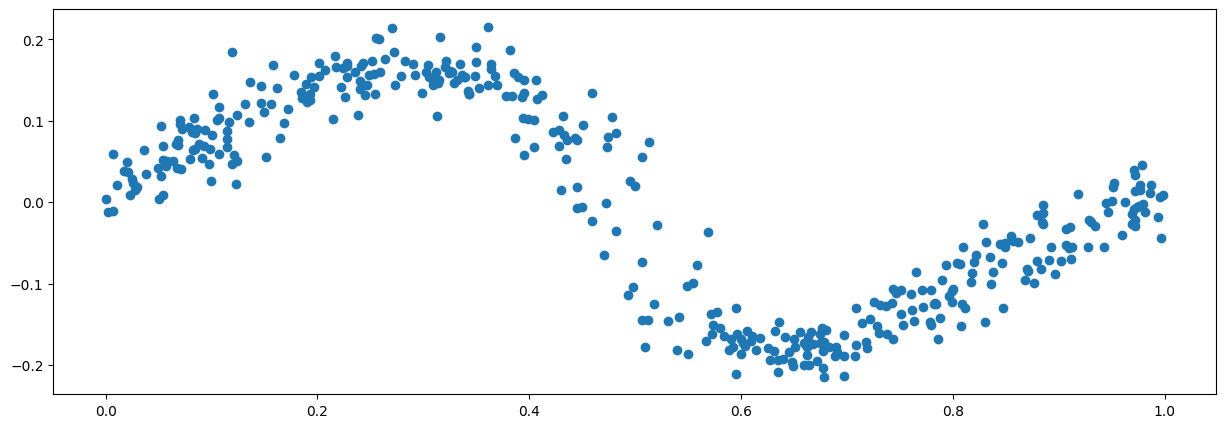

In [ ]:
plt.scatter(phi,df['y'])